<a href="https://colab.research.google.com/github/kukrejacharvie-pixel/customer-churn-prediction-/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [ ]:
#Read the file into the DataFrame
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Basic Dataset Checks and Info
# Check shape (rows, columns)
print("Dataset shape:", df.shape)

# Check data types and non-null counts
print("\nData Info:")
df.info()

# Numeric summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (7043, 21)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape


Churn value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


/tmp/ipython-input-3029075025.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


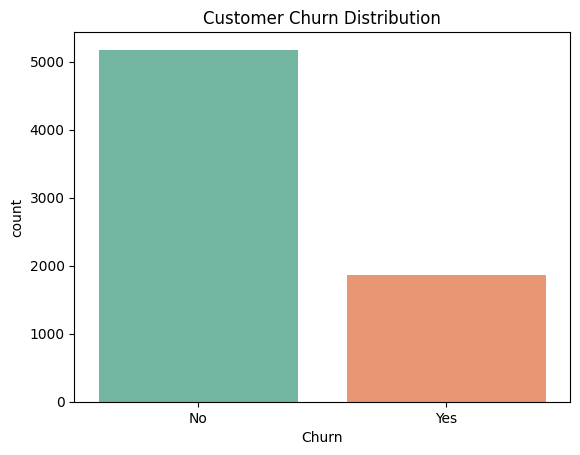

In [ ]:
#Understand the Target Variable "Churn"
# Distribution of the Churn column
print("\nChurn value counts:")
print(df['Churn'].value_counts())

# Visualize the churn distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()


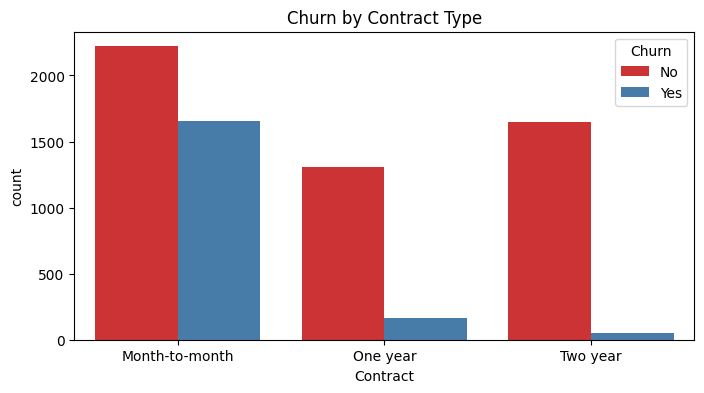

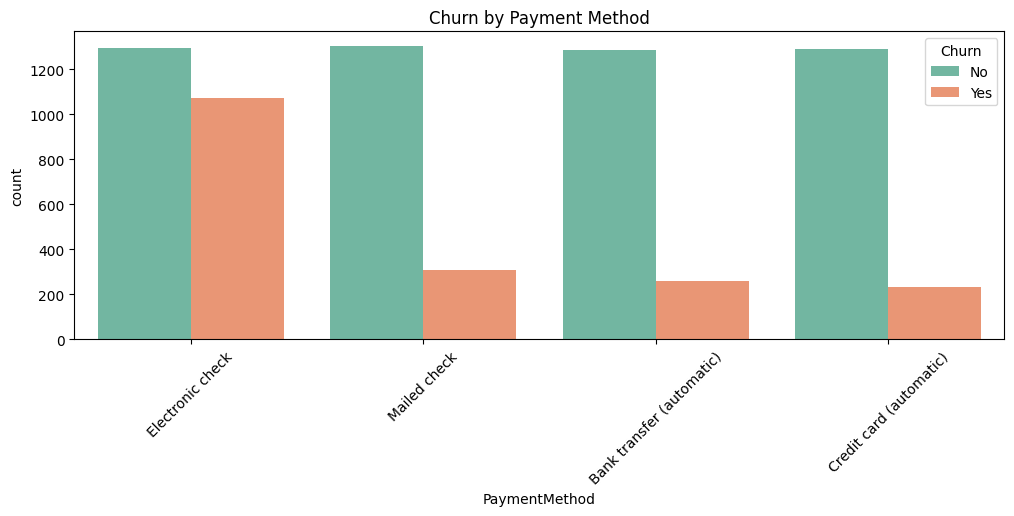

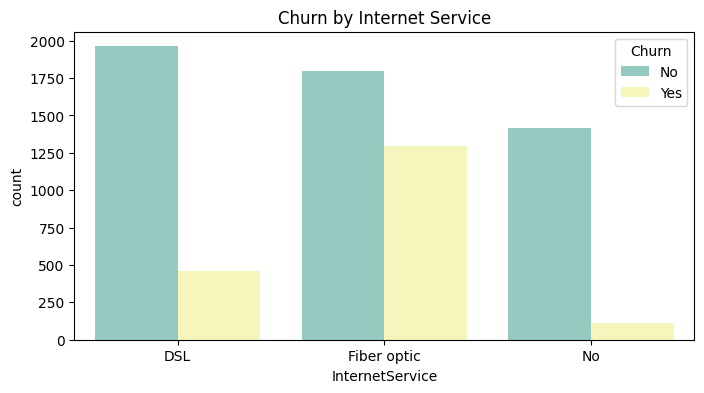

In [ ]:
#Check how churn varies by contract type, payment method, and internet service
import matplotlib.pyplot as plt
import seaborn as sns

# Plot churn by Contract type
plt.figure(figsize=(8, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Contract Type')
plt.show()

# Plot churn by Payment Method
plt.figure(figsize=(12, 4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Plot churn by Internet Service
plt.figure(figsize=(8, 4))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Internet Service')
plt.show()


/tmp/ipython-input-200700.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 'No', 'tenure'], label='No Churn', shade=True)
/tmp/ipython-input-200700.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'tenure'], label='Churn', shade=True)


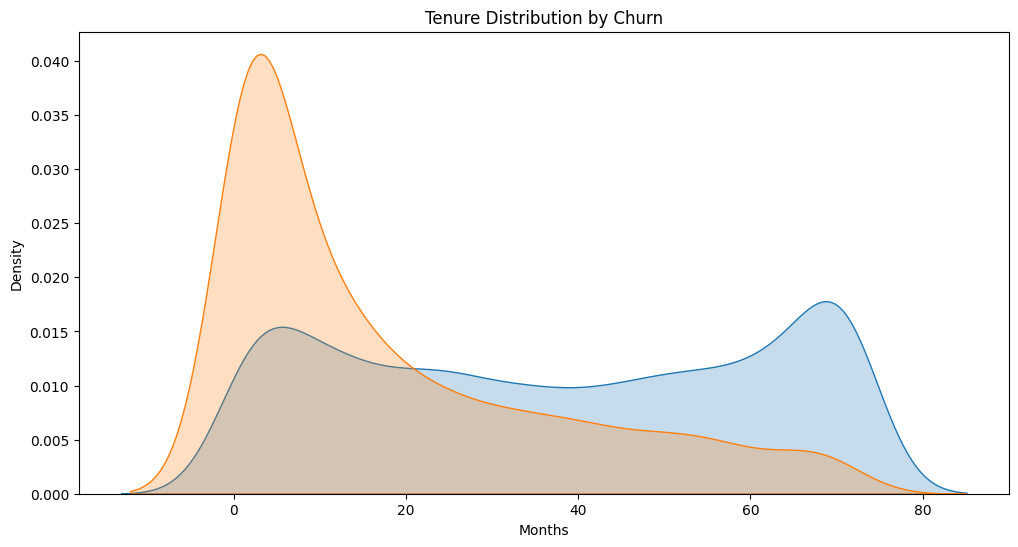

/tmp/ipython-input-200700.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 'No', 'MonthlyCharges'], label='No Churn', shade=True)
/tmp/ipython-input-200700.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'], label='Churn', shade=True)


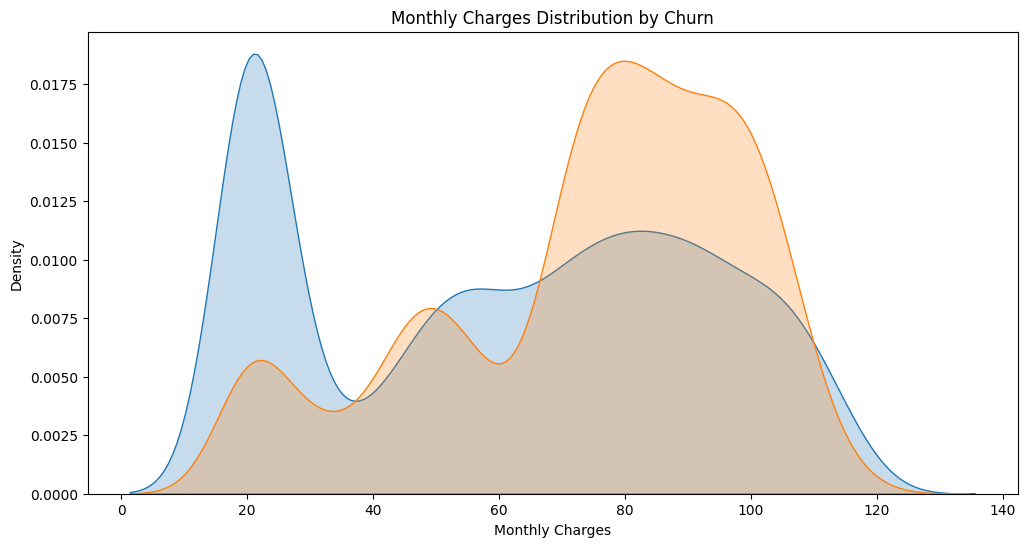

In [ ]:
#Check distribution of numeric features like tenure, monthly charges, total charges for churned vs non-churned customers
plt.figure(figsize=(12, 6))

# Tenure distribution
sns.kdeplot(df.loc[df['Churn'] == 'No', 'tenure'], label='No Churn', shade=True)
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'tenure'], label='Churn', shade=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Months')
plt.show()

# Monthly Charges distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(df.loc[df['Churn'] == 'No', 'MonthlyCharges'], label='No Churn', shade=True)
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'], label='Churn', shade=True)
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.show()


In [ ]:
#Check for Missing and Inconsistent Data
# Inspect rows with missing or blank total charges
missing_total_charges = df[df['TotalCharges'].apply(lambda x: x.strip() == '')]
print("Rows with missing TotalCharges:", missing_total_charges.shape[0])

# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values after conversion
print(df.isnull().sum())


Rows with missing TotalCharges: 11
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Select rows with any null values
null_rows = df[df.isnull().any(axis=1)]

# Display all such rows with their values
print(null_rows)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

Handling Missing Values in TotalCharges
In the dataset, we found 11 rows where the TotalCharges field is missing. Upon examining these entries, a pattern emerged: all these customers have a tenure of zero months. This means they are brand new customers who have just signed up for the service and haven’t incurred any charges yet.

These missing values aren’t errors or omissions; they genuinely represent customers who have not started billing. Because of this, simply removing these rows would mean losing insights about newly acquired customers—an important group for understanding early churn tendencies and customer behavior.

Therefore, instead of deleting them, we will keep these rows and handle the missing TotalCharges by assigning them a value of zero. This approach both respects the data’s real-world meaning and maintains the integrity of our dataset for modeling.

In [ ]:
#Impute missing TotalCharges with zero
df['TotalCharges'].fillna(0, inplace=True)

/tmp/ipython-input-671956381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
#Convert Columns to Correct Data Types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
#Encode Categorical Variables
# Columns with Yes/No values to convert
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [ ]:
#One-Hot Encode Multi-category Columns
df = pd.get_dummies(df, columns=['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)

Feature Scaling
Feature scaling helps to standardize numeric features to a common scale, which improves the efficiency and accuracy of many machine learning algorithms.

We will use StandardScaler from scikit-learn to apply Z-score normalization (mean=0, std=1):

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical columns to scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit the scaler on numerical features and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0.514251,0,0,-0.746535,-0.193672,0,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,-1.236724,1,1,0.197365,-0.938874,1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#Split Data into Features (X) and Target (y)
# Target variable
y = df['Churn']

# Features (drop Churn and CustomerID)
X = df.drop(columns=['Churn', 'customerID'])


In [ ]:
# Train-Test Split
# We will split the data into training and testing sets to evaluate model performance.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (5634, 30)
Testing data shape: (1409, 30)


**Applying Simple Logistic Regression**

In [ ]:
#Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train on training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Make Predictions and Evaluate
# Predict on test set
y_pred = logreg.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {acc:.4f}")

# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Logistic Regression Accuracy: 0.8062

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[927 108]
 [165 209]]


**What Our Model Results Tell Us**

After training our logistic regression model, we tested how well it predicts whether a customer will churn (leave) or stay with the company.

The model correctly predicts about 81 out of every 100 customers overall, which shows good general performance.

For customers who stay loyal, the model performs very well:

It correctly identifies 90% of loyal customers.

When the model predicts a customer will stay, it is right 85% of the time.

For customers who actually churn (leave), the model is less confident:

It successfully identifies 56% of the churners, meaning it misses about 44% of customers who actually leave.

Among those predicted to churn, the model is correct 66% of the time.

The confusion matrix breaks down these results:

Out of all loyal customers, 927 were correctly predicted to stay, but 108 were incorrectly flagged as churners.

Out of all churned customers, 209 were correctly identified as churners, but 165 were missed and predicted to stay instead.

This means while the model is good at spotting customers who stay, it misses a significant number of churners—those customers are especially important to catch so that interventions can be made.

In summary, the model is a promising start but improving its ability to detect customers likely to churn, so that fewer are missed, will increase its business value.

In [ ]:
# Train XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate XGBoost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("XGBoost Results")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))

XGBoost Results
Accuracy: 0.7722

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409


Confusion Matrix:
[[902 133]
 [188 186]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:08:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


The XGBoost model gave us good results overall, correctly predicting about 77% of customer churn cases. It showed strong performance in identifying customers who stayed loyal, catching nearly 87% of them and being right 83% of the time when making such predictions. However, when it came to spotting customers who actually churned, it was less accurate, identifying only half of them correctly and being right about 58% of the time it predicted churn. The confusion matrix confirmed that although the model is good at finding loyal customers, it missed quite a few who left, which is crucial information for targeting retention efforts. Despite this, XGBoost’s ability to model complex relationships within the data is valuable and with further tuning, its performance in detecting churners can be improved. Overall, it offers a more sophisticated approach compared to simpler models and captures nuances in customer behavior that can guide smarter business decisions.

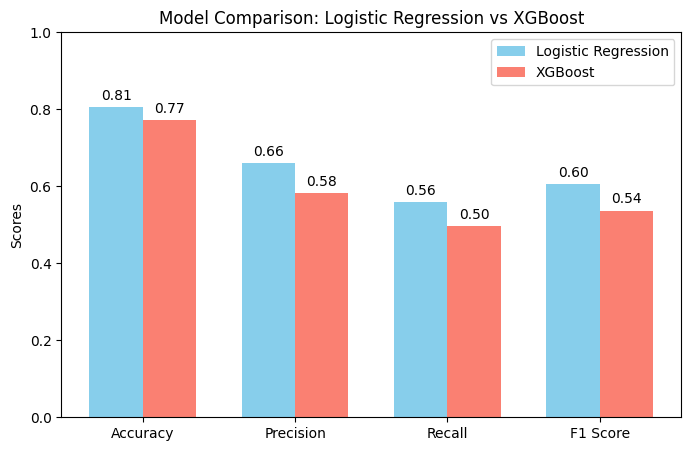

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate key evaluation metrics
def get_metrics(y_true, y_pred):
    """
    Calculate Accuracy, Precision, Recall, and F1 Score.

    Args:
        y_true: True labels
        y_pred: Predicted labels

    Returns:
        Dictionary containing metric names and their values.
    """
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

# Calculate metrics for Logistic Regression predictions
metrics_logreg = get_metrics(y_test, y_pred)

# Calculate metrics for XGBoost predictions
metrics_xgb = get_metrics(y_test, xgb_pred)

# Prepare data for plotting
metrics_names = list(metrics_logreg.keys())  # e.g. ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logreg_scores = list(metrics_logreg.values())
xgb_scores = list(metrics_xgb.values())

x = np.arange(len(metrics_names))  # Label locations (0, 1, 2, 3)
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars for Logistic Regression and XGBoost side by side
bars1 = ax.bar(x - width/2, logreg_scores, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='salmon')

# Set labels and titles
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Logistic Regression vs XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1)

# Add numeric labels on top of each bar
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

ax.legend()
plt.show()



***

The bar chart offers a clear, side-by-side look at how well Logistic Regression and XGBoost perform on your churn prediction task. Four key metrics are shown: accuracy, precision, recall, and F1 score. Across every metric, Logistic Regression comes out slightly ahead of XGBoost.

- **Accuracy:** Logistic Regression correctly predicts whether a customer will stay or leave about 81% of the time, compared to 77% for XGBoost.
- **Precision:** When it comes to predicting churn, Logistic Regression is right 66% of the time, while XGBoost gets it right 58% of the time. This means Logistic Regression makes fewer false alarms when flagging customers as likely to leave.
- **Recall:** Logistic Regression identifies 56% of all actual churners, while XGBoost catches 50%. Higher recall is crucial for finding at-risk customers before they leave.
- **F1 Score:** This overall balance of precision and recall is 0.60 for Logistic Regression and 0.54 for XGBoost, showing that Logistic Regression is more effective for this churn prediction problem.

In summary, while both models do a decent job, Logistic Regression proved better suited to your dataset for predicting customer churn in this round of testing. This suggests that, at least for now, a simpler model may perform as well—or better—than a more sophisticated one, though fine-tuning XGBoost could potentially help close the gap in future experiments.

